## Data Science Academy - time series exponential smoothing

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [94]:
df = pd.read_csv("../data/dataset.csv")

In [95]:
df.shape

(365, 2)

In [96]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [97]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [98]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [99]:
df['Data'].min()

'2023-01-01'

In [100]:
df['Data'].max()

'2023-12-31'

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [102]:
# Converts the 'Data' column to datetime.
df['Data'] = pd.to_datetime(df['Data'])

In [103]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [105]:
# Sets the index to 'Data'.
time_series = df.set_index('Data')['Total_Vendas']

In [106]:
type(time_series)

pandas.core.series.Series

In [107]:
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [108]:
# Sets the frequency to daily.
time_series = time_series.asfreq('D')

In [109]:
time_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

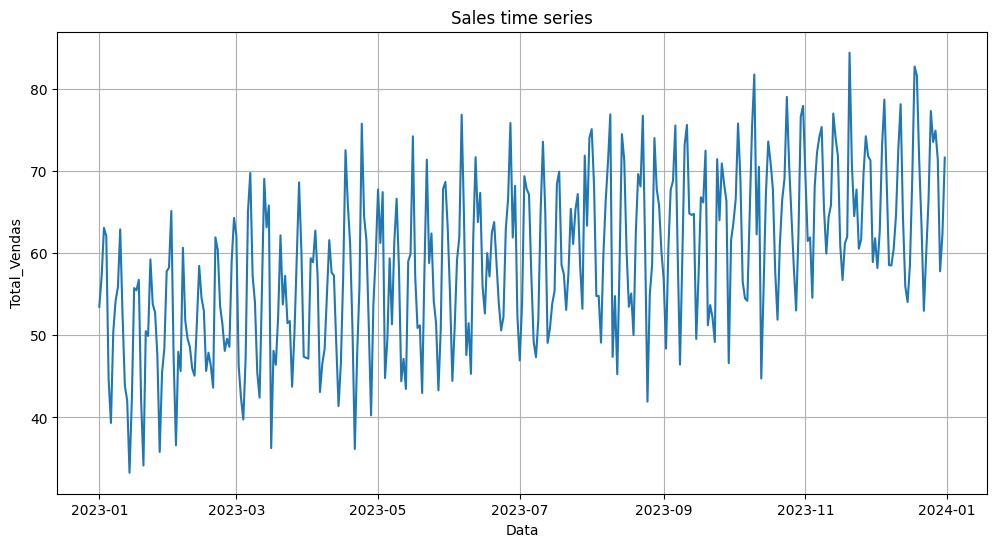

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.xlabel('Data')
plt.ylabel('Total_Vendas')
plt.title('Sales time series')
plt.grid(True)
plt.show()

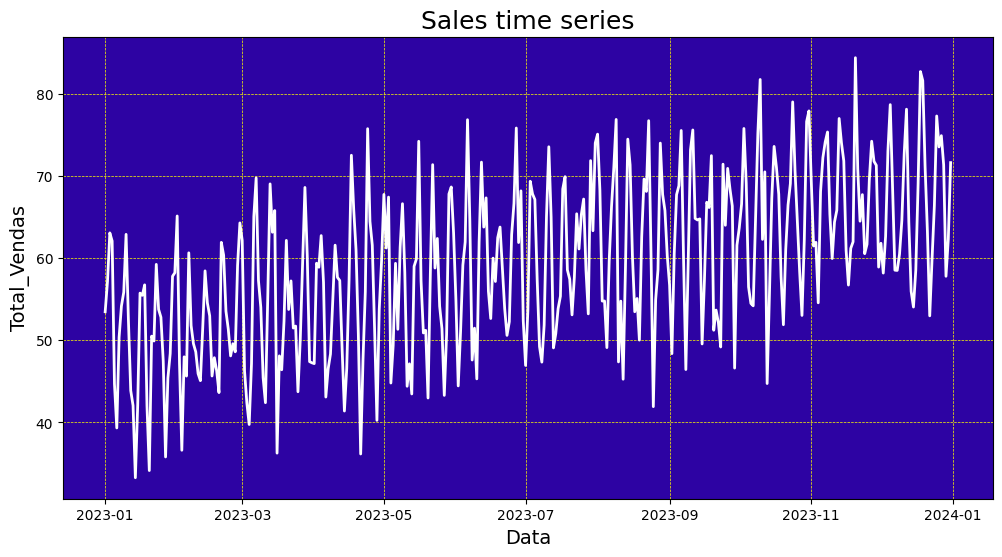

In [111]:
# Create time series plot with contrast layout.
plt.figure(figsize=(12, 6))
plt.plot(time_series, color = 'white', linewidth = 2)

# Configure colors and styles for the plot.
plt.gca().set_facecolor('#2d03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configure axis labels, titles and legend.
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Total_Vendas', color = 'black', fontsize = 14)
plt.title('Sales time series', color = 'black', fontsize = 18)

# Configure axis and ticks colors.
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

In [112]:
model = SimpleExpSmoothing(time_series)

In [113]:
adjusted = model.fit(smoothing_level = 0.2)

c:\dev\data-science-academy-time-series-exponential-smoothing\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [114]:
exponential_smoothing = adjusted.fittedvalues

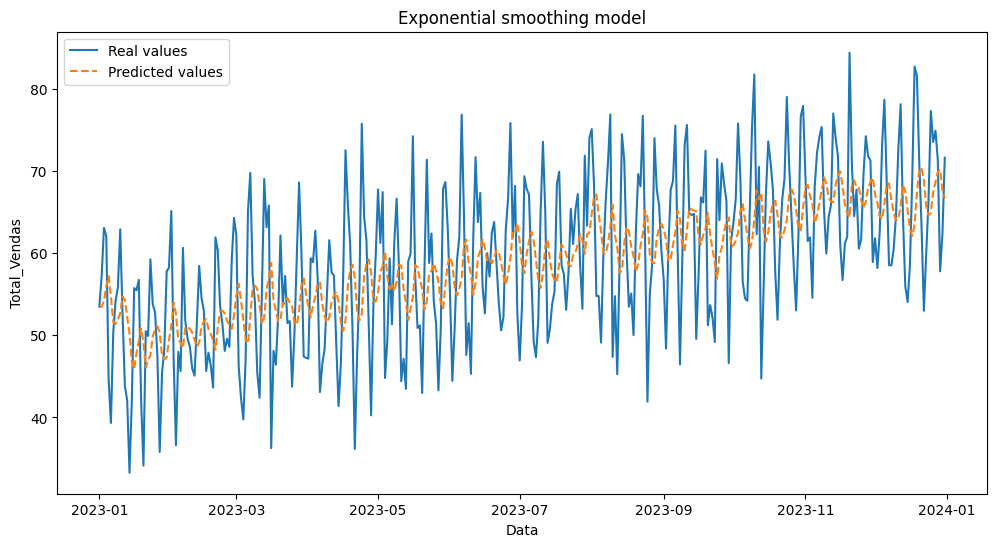

In [115]:
plt.figure(figsize = (12, 6))
plt.plot(time_series, label = 'Real values')
plt.plot(exponential_smoothing, label = 'Predicted values', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Total_Vendas')
plt.title('Exponential smoothing model')
plt.legend()
plt.show()

In [118]:
prediction_amount = 1

forecast = adjusted.forecast(steps = prediction_amount)
print(forecast)

2024-01-01    67.649892
Freq: D, dtype: float64
